In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/datastes/assignment2/weather_forecast_data.csv")

In [4]:
# Task 1: Preprocessing
# 1. Check for missing values
def checkMissing(df):
    print("Missing values per column:")
    print(df.isnull().sum())

In [5]:
# 2. Handle missing values by two techniques
def handle_missing(df, strategy):
    if strategy == "drop":
        return df.dropna()
    elif strategy == "replace":
        df_copy = df.copy()
        # Fill numeric columns with mean
        for col in df_copy.select_dtypes(include="number").columns:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
        # Fill categorical columns with mode
        for col in df_copy.select_dtypes(include="object").columns:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
        return df_copy
    else:
        raise ValueError("Invalid missing value strategy")

In [6]:
# 3. Preprocessing
def preprocess(df, scaling):
    X = df.drop(columns=["Rain"])
    y = df["Rain"]

    # Encode target
    y = LabelEncoder().fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numeric features
    scaler = MinMaxScaler() if scaling == "min-max" else StandardScaler()
    toscale = X_train.select_dtypes(include="number").columns
    X_train[toscale] = scaler.fit_transform(X_train[toscale])
    X_test[toscale] = scaler.transform(X_test[toscale])

    return X_train, X_test, y_train, y_test

In [7]:
# 4. Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
def plot_dt(dt,X_train):
  plt.figure(figsize=(10, 6))
  plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['No Rain', 'Rain'])
  plt.title("Decision Tree Visualization")
  plt.show()

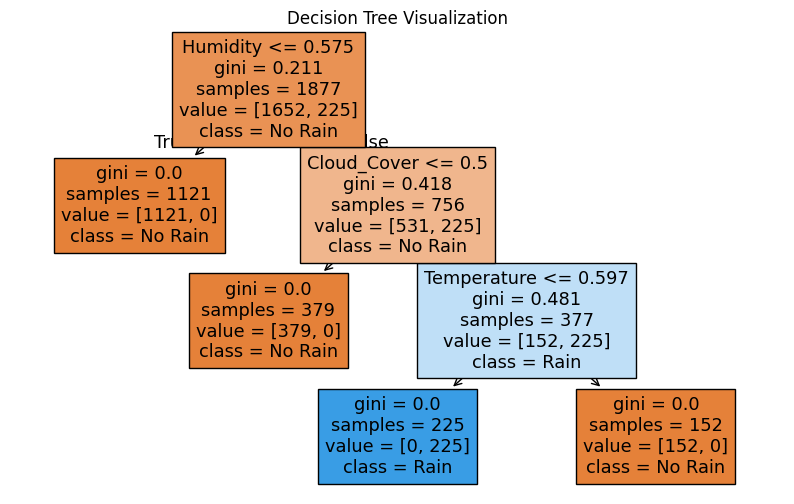


Decision Tree Metrics:
Accuracy: 0.997872340425532
Precision: 1.0
Recall: 0.9852941176470589


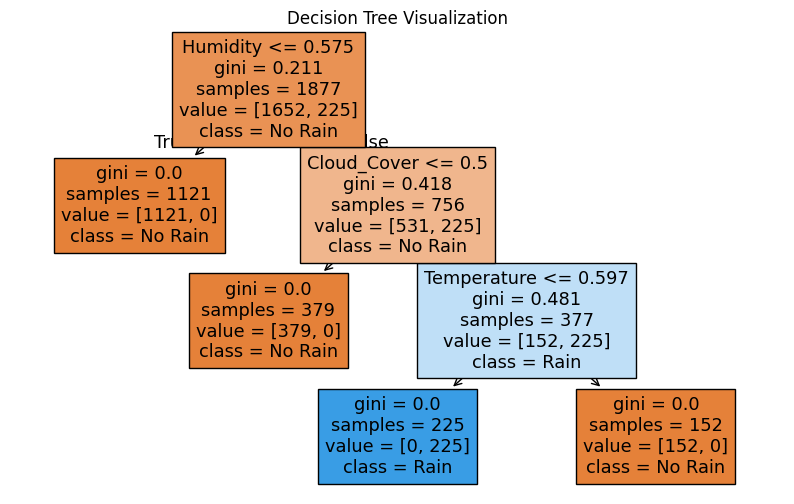


Decision Tree Metrics:
Accuracy: 0.997872340425532
Precision: 1.0
Recall: 0.9852941176470589


In [27]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    metrics = evaluate_model(dt, X_test, y_test)
    plot_dt(dt,X_train)
    print("\nDecision Tree Metrics:")
    print(f"Accuracy: {metrics[0]}")
    print(f"Precision: {metrics[1]}")
    print(f"Recall: {metrics[2]}")
    #return metrics

# dataset after droping missing values
df_drop= handle_missing(df, "drop")
X_train, X_test, y_train, y_test = preprocess(df_drop, "min-max")
DecisionTree(X_train, X_test, y_train, y_test)
# dataset after replacing missing values
df_replace= handle_missing(df, "replace")
X_train, X_test, y_train, y_test = preprocess(df_replace, "min-max")
DecisionTree(X_train, X_test, y_train, y_test)
